In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# REGGRESION
## DATA 5: WALMART DATASET

In [2]:
df_raw = pd.read_csv('Walmart.csv')
df = df_raw.copy()
df_raw

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


- Store: nomor toko 
- Date: tanggal penjualan
- Weekly_Sales: penjualan mingguan toko
- Holiday_Flag: banyaknya hari libur pada minggu tersebut
- Temperature: suhu pada minggu penjualan
- Fuel_Price: biaya bahan bakar di daerah tersebut
- CPI: (Consumer Price Index) indeks harga konsumen yang berlaku
- Unemployment: tingkat pengangguran yang berlaku

## A. Check Missing Value

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Berdasarkan df.info() terlihat bahwa dataset tidak terdapat missing value karena semua kolom tertulis 6435 non-null. 

In [4]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Menurut df.isnull().sum() diatas, terlihat bahwa dataset tidak mempunyai kolom bernilai NaN.

## B. Check Duplicates

In [5]:
df.duplicated().sum()

0

Berdasarkan df.duplicated().sum() terlihat bahwa dataset tidak mempunyai data duplikat.

## C. Feature Engineering

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day_Number'] = df['Date'].dt.weekday

#Convert days and months from numerics to categories
days = {0:'Minggu',1:'Senin',2:'Selasa',3:'Rabu',4:'Kamis',5: 'Jumat',6:'Sabtu'}
df['Day'] = df['Day_Number'].map(days)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day_Number,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,6,Sabtu
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,3,Rabu
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,4,Kamis
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,4,Kamis
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,0,Minggu
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,4,Kamis
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,3,Rabu
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,0,Minggu
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,4,Kamis


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Month         6435 non-null   int64         
 9   Year          6435 non-null   int64         
 10  Day_Number    6435 non-null   int64         
 11  Day           6435 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(5), object(1)
memory usage: 603.4+ KB


In [8]:
for i in ['Store','Fuel_Price','Unemployment','Day','Month','Year']:
    print(f'{i}: {df[i].nunique()}')

Store: 45
Fuel_Price: 892
Unemployment: 349
Day: 7
Month: 12
Year: 3


Terlihat bahwa, kolom `Store` mempunyai 45 nilai unik, kolom `Fuel_Price` mempunyai 892 nilai unik, kolom `Unemployment` mempunyai 349 nilai unik, kolom `Day` mempunyai 7 nilai unik, kolom `Month` mempunyai 12 nilai unik, dan kolom `Year` mempunyai 3 nilai unik yaitu tahun 2010, 2011, dan 2012.

## D. Corelation Analysis

<AxesSubplot:xlabel='Year', ylabel='Weekly_Sales'>

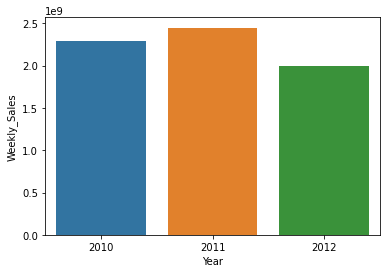

In [9]:
annual_sales = df[['Year', 'Weekly_Sales']].groupby('Year').sum().reset_index()
sns.barplot(x="Year", y="Weekly_Sales", data=annual_sales, label="Annual_Sales")

Dari hasil plot diatas, tahun 2011 mencatat jumlah penjualan tertinggi kemudian diikuti oleh tahun 2010 dan tahun 2012.

<AxesSubplot:xlabel='Day', ylabel='Weekly_Sales'>

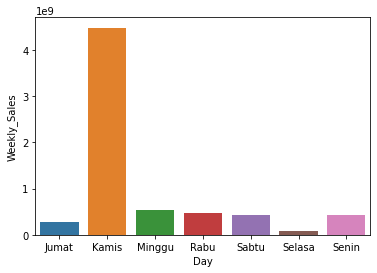

In [10]:
daily_sales = df[['Day', 'Weekly_Sales']].groupby('Day').sum().reset_index()
sns.barplot(x="Day", y="Weekly_Sales", data=daily_sales, label="Daily_Sales")

Dari hasil pie chart diatas, lebih dari 50% penjualan tertinggi terjadi pada Hari Kamis.

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

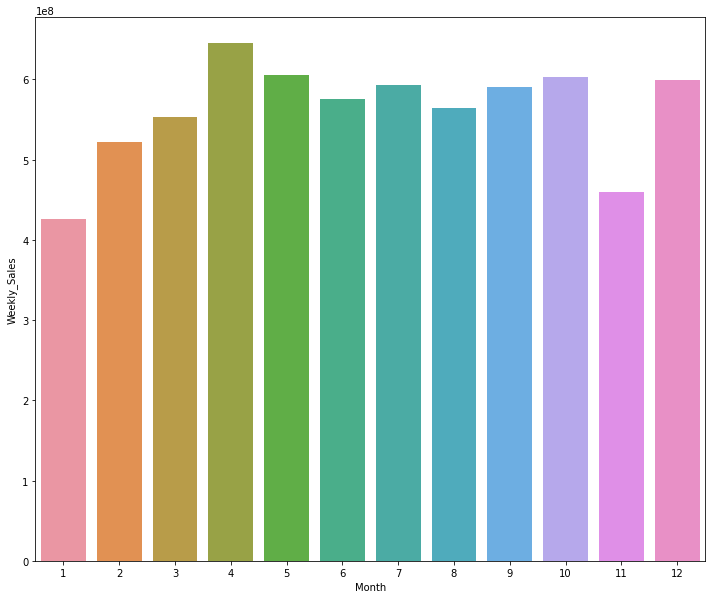

In [11]:
monthly_sales = df[['Month', 'Weekly_Sales']].groupby('Month').sum().reset_index()
plt.figure(figsize=(12,10))
sns.barplot(x="Month", y="Weekly_Sales", data=monthly_sales, label="Monthly_Sales")

Terlihat dari pie chart diatas, penjualan tertinggi tercatat pada Bulan April kemudian disusul Bulan Mei, Oktober, dan Desember sebagai penjualan tertinggi selanjutnya. Dan penjualan terendah tercatat pada Bulan Januari.

In [12]:
df.corr('spearman').style.background_gradient(cmap='mako')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day_Number
Store,1.000000,-0.309227,0.000000,-0.026392,0.064878,-0.238852,0.304139,0.000000,0.000000,0.000000
Weekly_Sales,-0.309227,1.000000,0.027774,-0.070962,0.025471,-0.055040,-0.062354,0.045589,-0.006395,-0.018558
Holiday_Flag,0.000000,0.027774,1.000000,-0.143588,-0.080111,-0.004752,0.011177,0.329995,-0.056426,-0.091559
Temperature,-0.026392,-0.070962,-0.143588,1.000000,0.128624,0.165957,0.038833,0.070467,0.064448,0.004193
Fuel_Price,0.064878,0.025471,-0.080111,0.128624,1.000000,-0.045867,-0.064725,-0.056058,0.762505,-0.060913
CPI,-0.238852,-0.055040,-0.004752,0.165957,-0.045867,1.000000,-0.388563,0.005928,0.220834,-0.031950
Unemployment,0.304139,-0.062354,0.011177,0.038833,-0.064725,-0.388563,1.000000,-0.001387,-0.279020,0.043187
Month,0.000000,0.045589,0.329995,0.070467,-0.056058,0.005928,-0.001387,1.000000,-0.135752,-0.128210
Year,0.000000,-0.006395,-0.056426,0.064448,0.762505,0.220834,-0.279020,-0.135752,1.000000,-0.128449
Day_Number,0.000000,-0.018558,-0.091559,0.004193,-0.060913,-0.031950,0.043187,-0.128210,-0.128449,1.000000


Dapat dilihat bahwa dua variabel yang memiliki korelasi tinggi adalah `Year` dan `Fuel_Price`. Hal ini make sense karena, biaya bahan bakar di daerah tertentu pasti berbeda setiap tahunnya.

### D1. Visualization

### Pengaruh `Store` terhadap `Weekly_Sales`

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

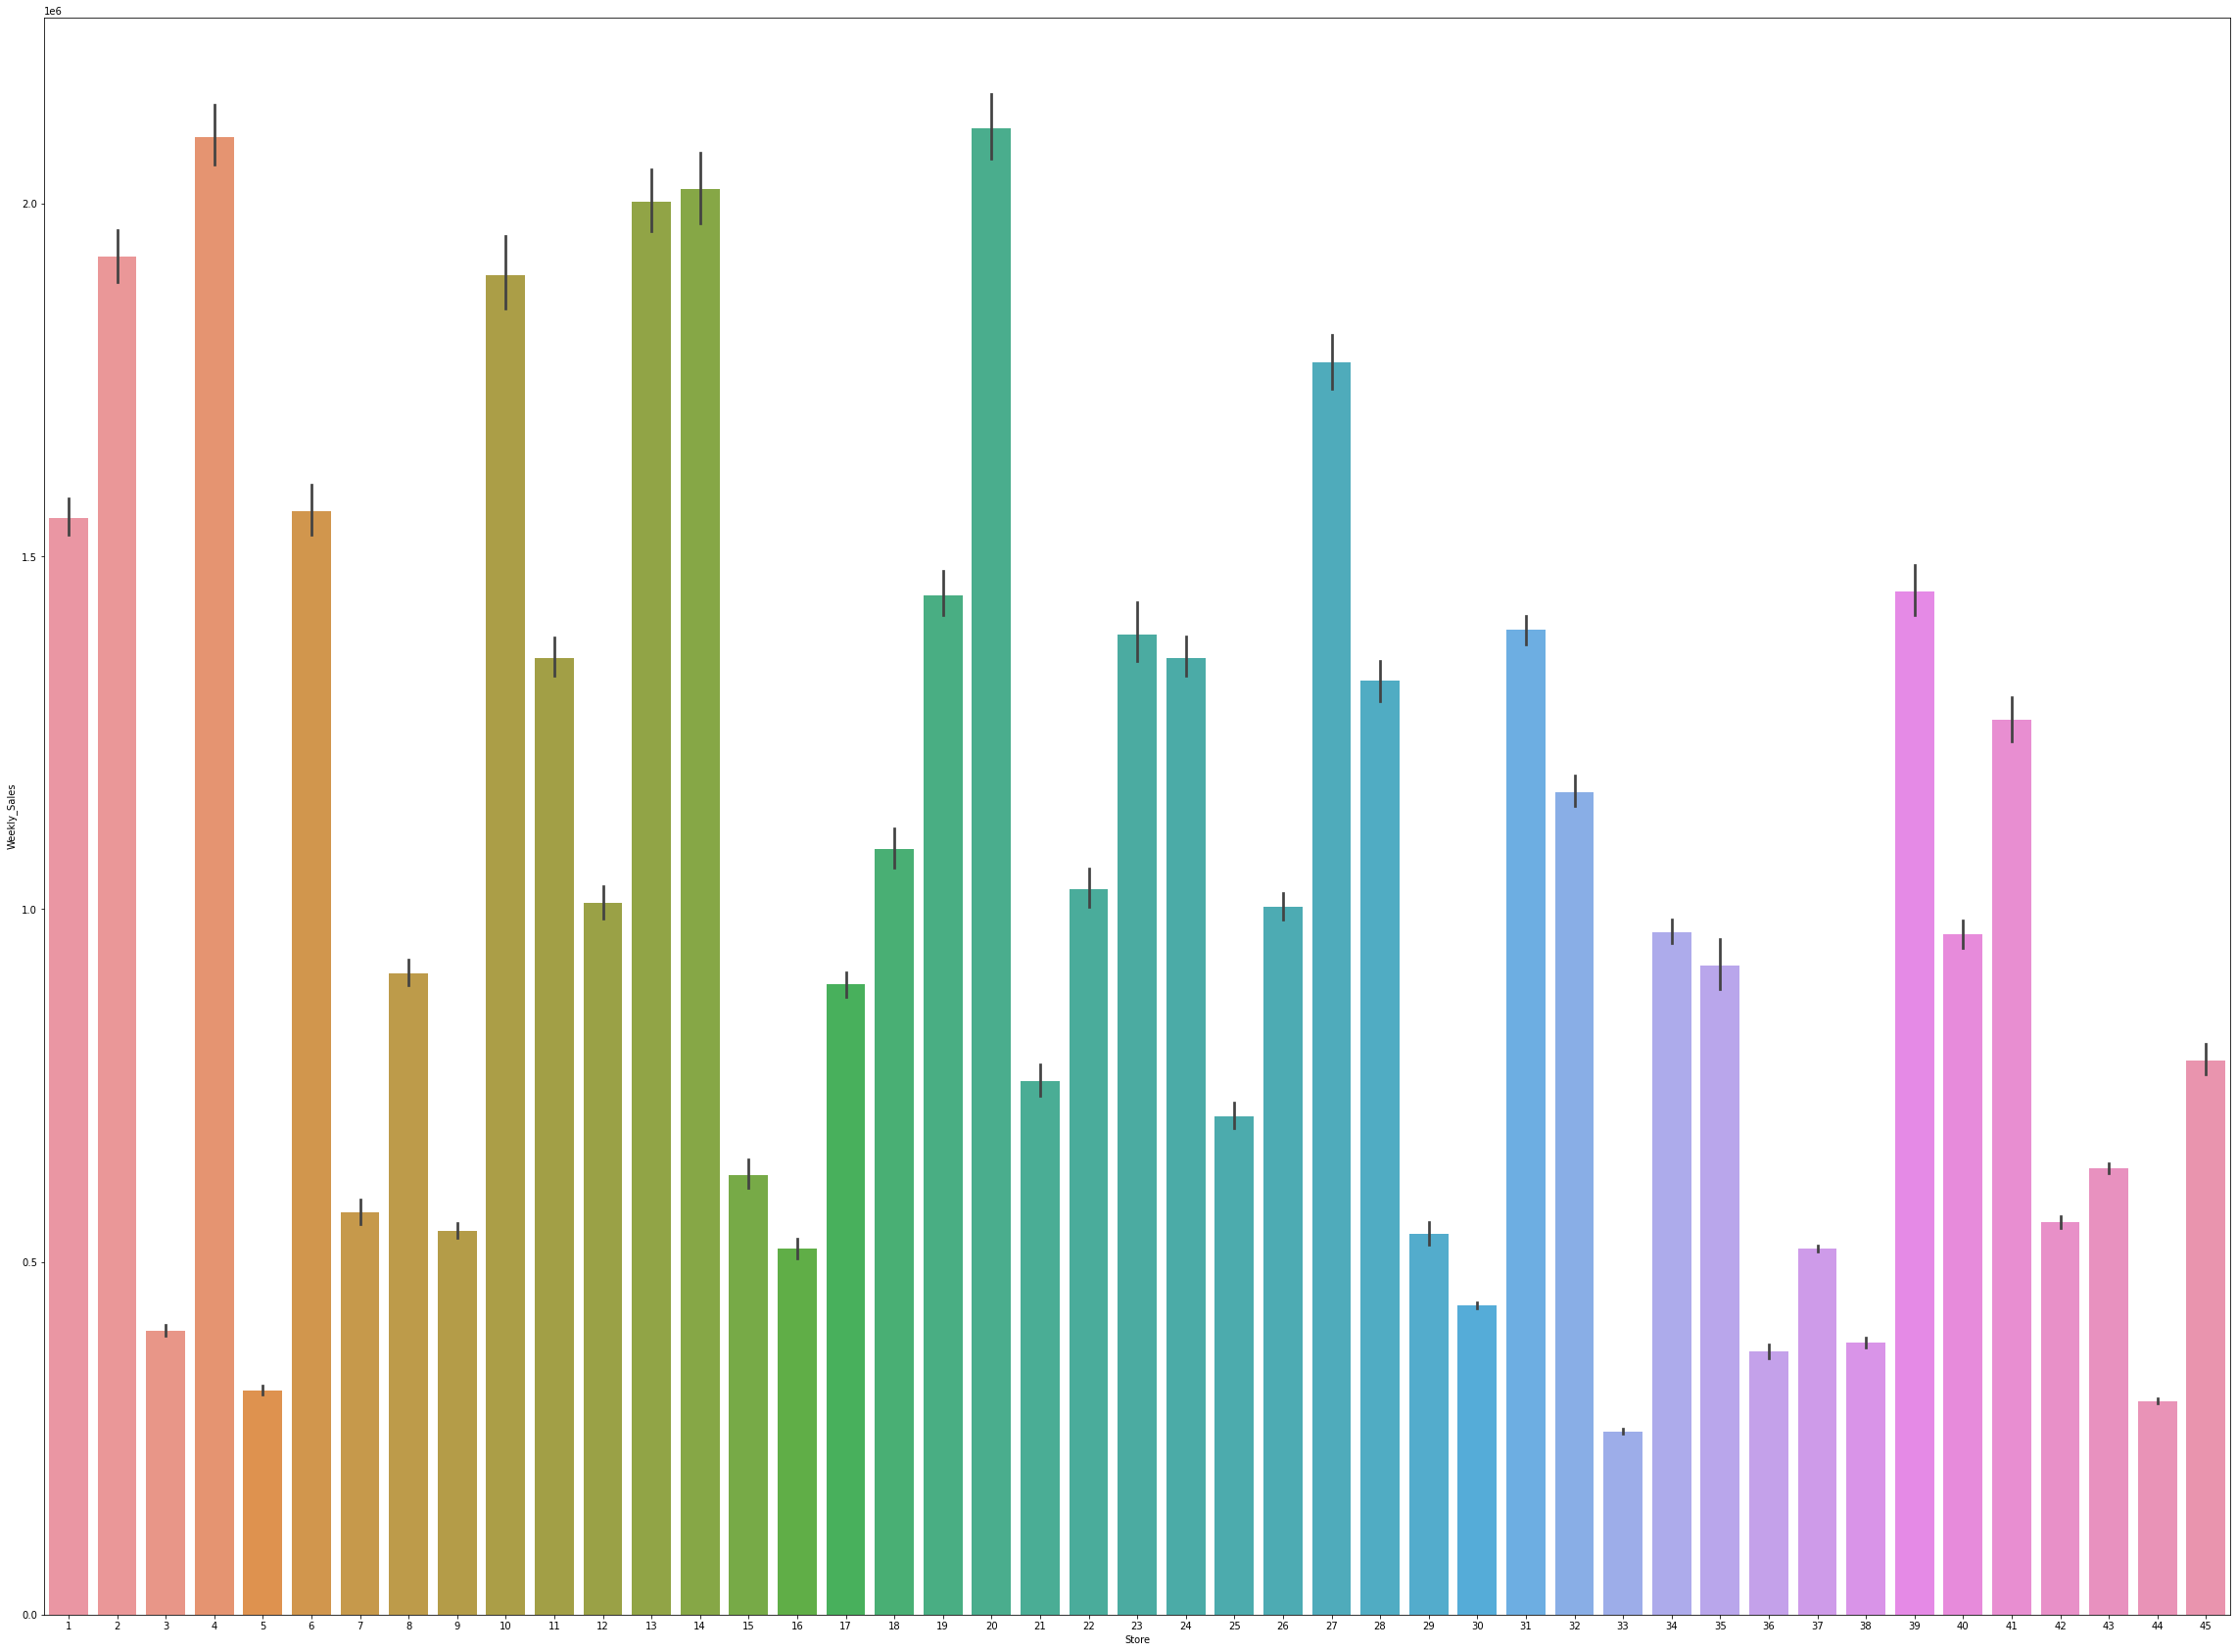

In [13]:
plt.figure(figsize=(40,30))
sns.barplot(x=df.Store, y = df.Weekly_Sales)

Dari barplot diatas, terlihat bahwa penjualan tertinggi tercatat pada `Store` 20.

### Pengaruh `Holiday_Flag` terhadap `Weekly_Sales`

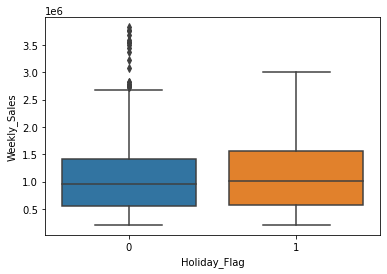

In [14]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'Holiday_Flag', y = 'Weekly_Sales')
plt.show() 

Korelasi antara `Holiday_Flag` dan `Weekly_Sales` dikatakan rendah karena dari boxplot terlihat perbedaan penjualan di hari libur dan hari tidak libur tidak jauh beda.

### `Temperature` 

In [15]:
sales_temp = df[['Temperature', 'Weekly_Sales']].groupby('Temperature').mean().reset_index()

<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

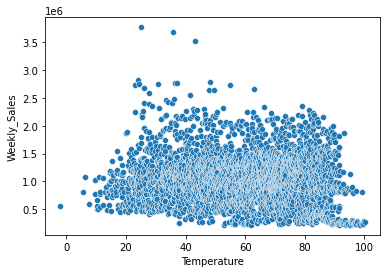

In [16]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=sales_temp)

Dapat dilihat bahwa `Temperature` pada selang 60-70 mempengaruhi penjualan, dimana terlihat dari tingginya histogram diatas pada selang tersebut.

### Pengaruh `Fuel_Price` terhadap `Weekly_Sales`

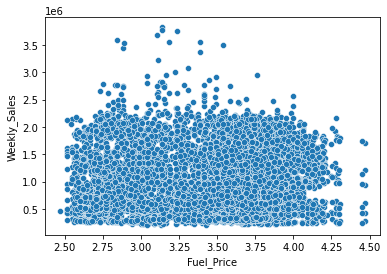

In [17]:
fig = plt.figure()  
ax = sns.scatterplot(data = df, x='Fuel_Price', y = 'Weekly_Sales')
plt.show() 

Dari visualisasi scatter plot diatas, menyimpulkan bahwa ***tidak ada*** hubungan yang kuat antara penjualan dengan harga bahan bakar.

### Pengaruh `CPI` terhadap `Weekly_Sales`

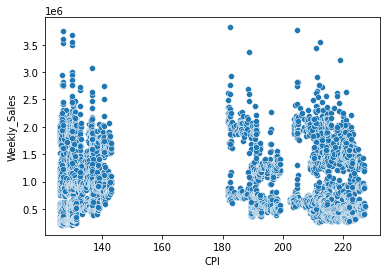

In [18]:
fig = plt.figure()  
ax = sns.scatterplot(data = df, x='CPI', y = 'Weekly_Sales')
plt.show() 

Pada scatter plot diatas rentang CPI yang berbeda memiliki distribusi penjualan yang sama. Sehingga disimpulkan bahwa perbedaan Indeks Harga Konsumen (CPI) ***tidak akan*** mempengaruhi penjualan. 

### `Unemployment`

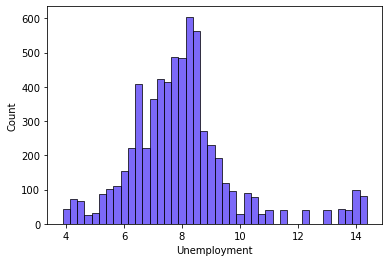

In [21]:
fig = plt.figure()  
ax = sns.histplot(data = df, x='Unemployment', binwidth = 0.25, color='#5037F6')
plt.show() 

Berdasarkan visualisasi ini, kita dapat mengetahui bahwa tingkat pengangguran yang rendah akan berpengaruh pada penjualan (terindikasikan dari tingginya 'bar' diantara rentang 6-10). 

## Insight

- Tahun 2011 mencatat jumlah penjualan tertinggi kemudian diikuti oleh tahun 2010 dan tahun 2012.
- Penjualan tertinggi terjadi pada Hari Kamis yaitu lebih dari 50%.
- Bulan April tercatat sebagai penjualan tertinggi dan Bulan Januari sebagai penjualan terendah.
- Penjualan tertinggi tercatat pada `Store` 20.
- Berdasarkan spearman correlation, `Year` dan `Fuel_Price` merupakan dua variabel yang mempunyai korelasi tinggi, hal tersebut make sense karena biaya bahan bakar di daerah tertentu pasti berbeda setiap tahunnya.
- Korelasi antara `Holiday_Flag` dan `Weekly_Sales` dikatakan rendah karena dari boxplot terlihat perbedaan penjualan di hari libur dan hari tidak libur tidak jauh beda. 
- `Temperature` pada selang 60-70 mempengaruhi penjualan, dimana terlihat dari tingginya histogram pada selang tersebut.
- ***Tidak ada*** korelasi antara `Fuel_Price` dan `Weekly_Sales`.
- Rentang CPI yang berbeda memiliki distribusi penjualan yang sama. Sehingga disimpulkan bahwa perbedaan Indeks Harga Konsumen (`CPI`) ***tidak akan*** mempengaruhi penjualan.
- Terdapat korelasi antara `Unemployment` dan `Weekly_Sales` bahwa tingkat pengangguran yang rendah akan berpengaruh pada penjualan (terindikasikan dari tingginya 'bar' diantara rentang 6-10).

## E. Check Outliers

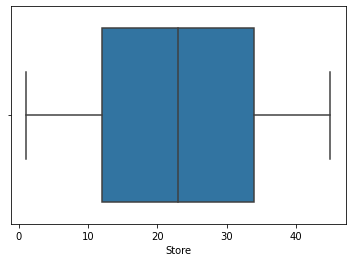

In [21]:
#Visualisasi IQR Method
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'Store')
plt.show() 

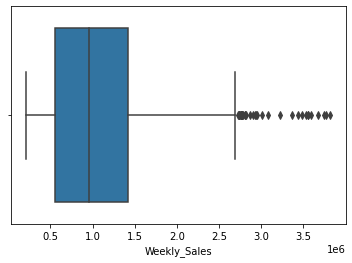

In [22]:
#Visualisasi IQR Method
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'Weekly_Sales')
plt.show() 

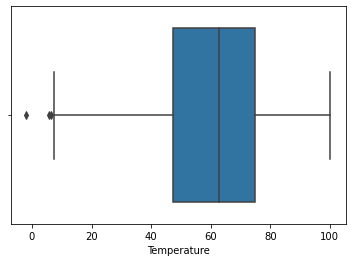

In [23]:
#Visualisasi IQR Method
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'Temperature')
plt.show() 

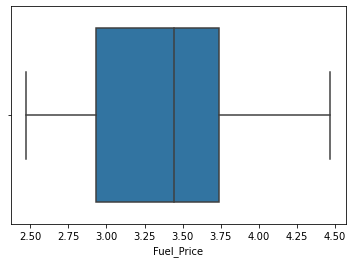

In [24]:
#Visualisasi IQR Method
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'Fuel_Price')
plt.show() 

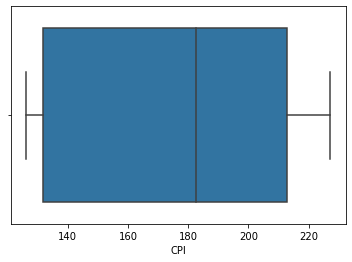

In [25]:
#Visualisasi IQR Method
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'CPI')
plt.show() 

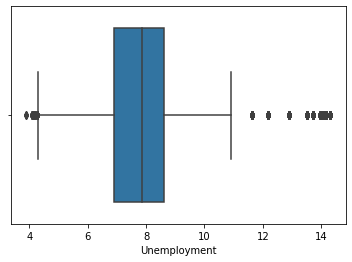

In [26]:
#Visualisasi IQR Method
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'Unemployment')
plt.show() 

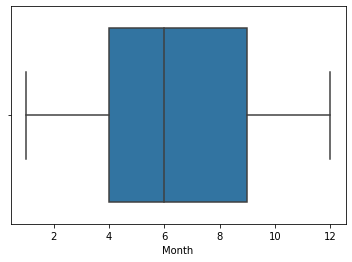

In [27]:
#Visualisasi IQR Method
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'Month')
plt.show() 

Berdasarkan boxplot masing-masing kolom numerik diatas, terdapat outliers pada kolom `Weekly_Sales`, `Temperature`, dan `Unemployment`. Dalam meng-handle outliers dengan meremove kolom yang mempunyai outliers tersebut.

## E1. Handle Outliers

In [28]:
df.shape

(6435, 12)

In [29]:
#Removal Weekly_Sales
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

df1 = df[df['Weekly_Sales'] >= Q1-1.5*(IQR)]

df1 = df[df['Weekly_Sales'] <= Q3+1.5*(IQR)]
df1.shape

(6401, 12)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

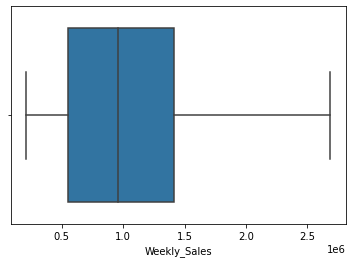

In [30]:
#Ploting boxplot after removing outliers
sns.boxplot(df1['Weekly_Sales'])

In [31]:
#Removal Temperature
Q1 = df1['Temperature'].quantile(0.25)
Q3 = df1['Temperature'].quantile(0.75)
IQR = Q3 - Q1

df2 = df1[df1['Temperature'] >= Q1-1.5*(IQR)]

df2 = df1[df1['Temperature'] <= Q3+1.5*(IQR)]
df2.shape

(6401, 12)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

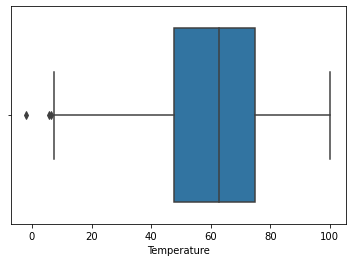

In [32]:
#Ploting boxplot after removing outliers
sns.boxplot(df2['Temperature'])

In [33]:
#Removal Unemployment
Q1 = df2['Unemployment'].quantile(0.25)
Q3 = df2['Unemployment'].quantile(0.75)
IQR = Q3 - Q1

df3 = df2[df2['Unemployment'] >= Q1-1.5*(IQR)]

df3 = df2[df2['Unemployment'] <= Q3+1.5*(IQR)]
df3.shape

(6023, 12)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Unemployment'>

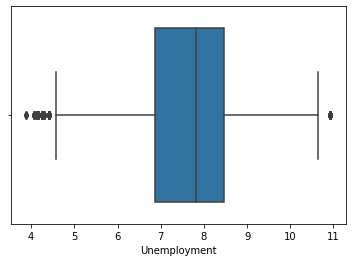

In [34]:
#Ploting boxplot after removing outliers
sns.boxplot(df3['Unemployment'])

Setelah dilakukan removal kolom yang mempunyai outliers didapatkan dimensi data baru Walmart yang terdiri dari 6023 baris dan 12 kolom.

In [35]:
df3.to_excel('Dataset_up.xlsx')

In [36]:
df3

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day_Number,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,6,Sabtu
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,3,Rabu
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,4,Kamis
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,4,Kamis
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,0,Minggu
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,4,Kamis
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,3,Rabu
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,0,Minggu
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,4,Kamis
